<a href="https://colab.research.google.com/github/khoaphamj1505/CS114.L11.KHCL/blob/master/sarcasm%20detection/News_Headlines_Dataset_For_Sarcasm_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## IMPORT THƯ VIỆN

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay, classification_report

## UPLOAD VÀ ĐỌC DATA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1 = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Sarcasm_Headlines_Dataset.json", lines=True)
df1.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
df2 = pd.read_json("/content/drive/MyDrive/Colab Notebooks/Sarcasm_Headlines_Dataset_v2.json", lines=True)
df2.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


## CHIA DATA

In [5]:
X1_train, X1_test, Y1_train, Y1_test=train_test_split(df1['headline'], df1['is_sarcastic'], random_state=100)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(df2['headline'], df2['is_sarcastic'], random_state=100)

In [6]:
X_train=pd.concat([X1_train, X2_train], ignore_index=True)
X_test=pd.concat([X1_test,X2_test], ignore_index=True)
Y_train=pd.concat([Y1_train,Y2_train], ignore_index=True)
Y_test=pd.concat([Y1_test, Y2_test], ignore_index=True)

## LỌC VÀ CHUẨN HÓA DỮ LIỆU

In [7]:
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english', ngram_range=(1,3))
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

## TRAINING VÀ ĐÁNH GIÁ MODEL

In [8]:
logreg = LogisticRegression(C=1000.0, solver='liblinear').fit(X_train, Y_train)
Y_pred=logreg.predict(X_test)

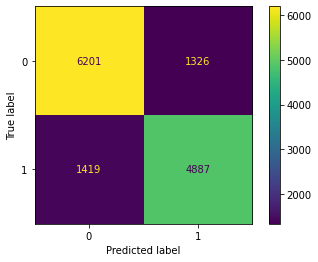

In [9]:
cm=confusion_matrix(Y_test, Y_pred)
cm_display=ConfusionMatrixDisplay(cm, display_labels=[0, 1]).plot(values_format="d")

In [10]:
print(classification_report(Y_test, Y_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.81      0.82      0.82      7527
           1       0.79      0.77      0.78      6306

    accuracy                           0.80     13833
   macro avg       0.80      0.80      0.80     13833
weighted avg       0.80      0.80      0.80     13833

